<a href="https://colab.research.google.com/github/jjonhwa/DeepLearning.AI-TensorFlow/blob/main/10_Course_2_Part_6_Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop

In [2]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
-O /tmp/inception_v3_weights_tf_dim_orderting_tf_kernels_notop.h5

--2021-01-05 05:21:56--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.195.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_orderting_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   251MB/s    in 0.3s    

2021-01-05 05:21:56 (251 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_orderting_tf_kernels_notop.h5’ saved [87910968/87910968]



In [3]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_orderting_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)
pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers :
  layer.trainable = False

#pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape : ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape :  (None, 7, 7, 768)


* Dropout : threshold값을 임의로 지정한 후 그 값을 확률값으로 각 node들을 없앨지 그대로 둘지 결정한다.(이로부터 Overfitting을 방지하는 기법이다.)
* Dropout이 잘 작동하는 이유
1. 각 노드들의 주변 노드들은 비슷한 특징을 가지고 있으므로 없애줌으로서 overfit을 방지할 수 있다.
2. 각 뉴런들은 바로 앞 뉴런들에 지나치게 가중화되어 있을 수 있다. 이때 각 뉴런들의 node들을 없애줌으로서 이를 방지할 수 있다.

In [4]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr = .001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [5]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2021-01-05 05:22:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   127MB/s    in 0.5s    

2021-01-05 05:22:04 (127 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1. /255,
    rotation_range = 20,
    width_shift_range = .2,
    height_shift_range = .2,
    shear_range = .2,
    zoom_range = .2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1. /255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'binary',
    batch_size = 20
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    class_mode= 'binary',
    batch_size = 20
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/20
100/100 - 27s - loss: 1.3199 - acc: 0.8550 - val_loss: 0.3217 - val_acc: 0.9230
Epoch 2/20
100/100 - 17s - loss: 0.4217 - acc: 0.9105 - val_loss: 0.1992 - val_acc: 0.9610
Epoch 3/20
100/100 - 17s - loss: 0.3581 - acc: 0.9225 - val_loss: 0.2458 - val_acc: 0.9510
Epoch 4/20
100/100 - 17s - loss: 0.3286 - acc: 0.9265 - val_loss: 0.1814 - val_acc: 0.9580
Epoch 5/20
100/100 - 17s - loss: 0.2879 - acc: 0.9305 - val_loss: 0.1600 - val_acc: 0.9570
Epoch 6/20
100/100 - 17s - loss: 0.2691 - acc: 0.9345 - val_loss: 0.1809 - val_acc: 0.9470
Epoch 7/20
100/100 - 17s - loss: 0.2129 - acc: 0.9435 - val_loss: 0.1854 - val_acc: 0.9600
Epoch 8/20
100/100 - 17s - loss: 0.2320 - acc: 0.9380 - val_loss: 0.1451 - val_acc: 0.9610
Epoch 9/20
100/100 - 17s - loss: 0.1901 - acc: 0.9475 - val_loss: 0.2042 - val_acc: 0.9670
Epoch 10/20
100/100 - 17s - loss: 0.2291 - acc: 0.9380 - val_loss: 0.1380 - val_acc: 0.9700
Epoch 11/20
100/100 - 17s - loss: 0.1844 - acc: 0.9530 - val_loss: 0.1612 - val_acc: 0.95

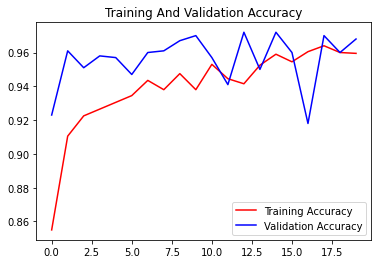

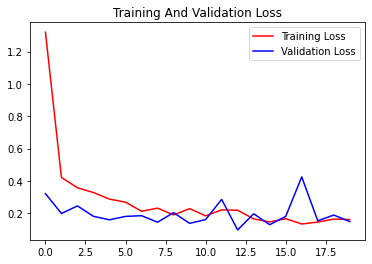

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training And Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()